### Hos_Rec_OLS

<h1><center>Project </center></h1>
<h1><center>by </center></h1>
<h1><center> Piyush Vyas </center></h1>



In [77]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import seaborn as sns

#pip install plotly
import plotly
from plotly import graph_objs
# plotly configuration
#plotly.offline.init_notebook_mode()
import matplotlib.pyplot as plt

In [78]:
#load test and train data
train = pd.read_csv("f_ml1adopt21.csv")

# Step 1 Descriptive Analysis:


### Train data shape 

In [79]:
train.shape

(2536, 16)

In [80]:

# have look at the train and test data (first five rows)
print("train data first five rows")
train.head(5)


train data first five rows


,facility_id,measure_code,measure_desc,recommend,ans_percent,rating,ed_score,sep_score,op_score,op_3b_heart_attack_care,imm3_score,op18_score,H_CLEAN,H_COMP_Nurse,H_COMP_Doc,label
0,271331,ED_2b,Average (median) time patients spent in the em...,H_RECMND_DY,46,3,83,125,22,273,90,80,0,0,0,0
1,450346,OP_22,Left before being seen,H_RECMND_DN,3,2,72,125,5,220,89,80,1,1,1,1
2,390073,OP_18b,Average (median) time patients spent in the em...,H_RECMND_DY,55,3,72,125,22,197,99,174,0,0,0,0
3,191326,SEP_1,Appropriate care for severe sepsis and septic ...,H_RECMND_DY,31,3,72,83,22,196,91,80,1,1,1,0
4,390256,OP_18b,Average (median) time patients spent in the em...,H_RECMND_DN,3,4,72,125,22,195,91,234,1,1,1,1


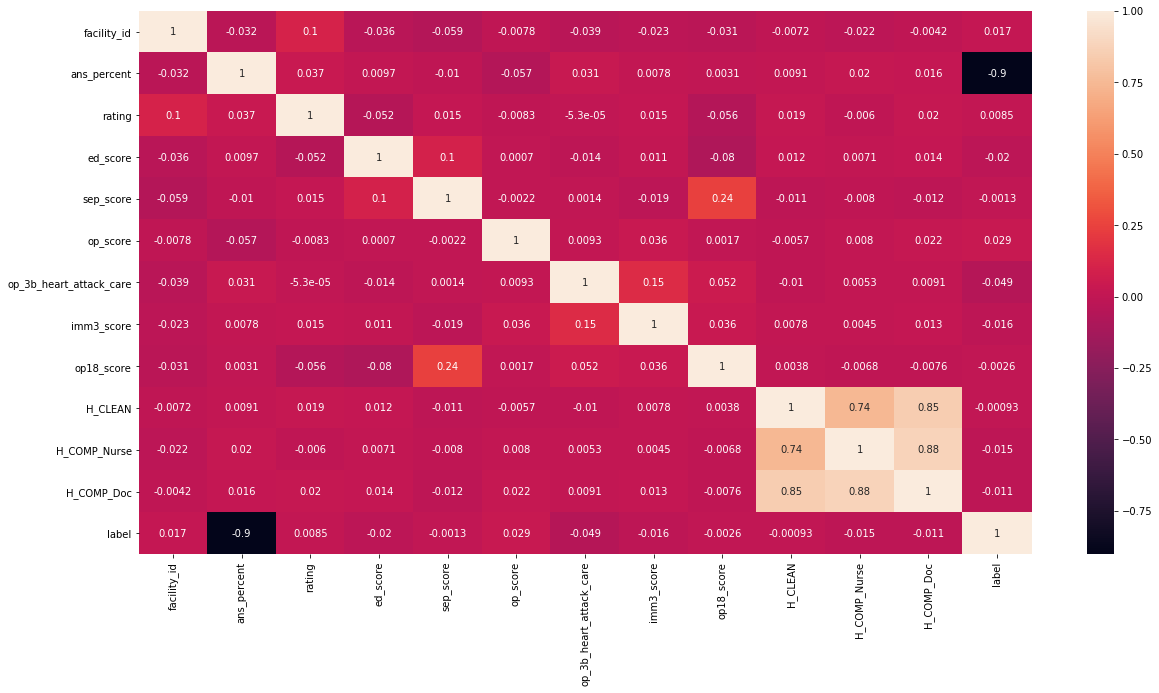

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(train.corr(), annot=True)  #.join(train.label)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   facility_id              2536 non-null   int64 
 1   measure_code             2536 non-null   object
 2   measure_desc             2536 non-null   object
 3   recommend                2536 non-null   object
 4   ans_percent              2536 non-null   int64 
 5   rating                   2536 non-null   int64 
 6   ed_score                 2536 non-null   int64 
 7   sep_score                2536 non-null   int64 
 8   op_score                 2536 non-null   int64 
 9   op_3b_heart_attack_care  2536 non-null   int64 
 10  imm3_score               2536 non-null   int64 
 11  op18_score               2536 non-null   int64 
 12  H_CLEAN                  2536 non-null   int64 
 13  H_COMP_Nurse             2536 non-null   int64 
 14  H_COMP_Doc               2536 non-null  

In [83]:
y = train.iloc[:,15].values 

In [84]:
y

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [85]:
data=train.drop(columns = ['measure_code','measure_desc','recommend','facility_id' ,'label','ans_percent','rating'] )

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ed_score                 2536 non-null   int64
 1   sep_score                2536 non-null   int64
 2   op_score                 2536 non-null   int64
 3   op_3b_heart_attack_care  2536 non-null   int64
 4   imm3_score               2536 non-null   int64
 5   op18_score               2536 non-null   int64
 6   H_CLEAN                  2536 non-null   int64
 7   H_COMP_Nurse             2536 non-null   int64
 8   H_COMP_Doc               2536 non-null   int64
dtypes: int64(9)
memory usage: 178.4 KB


In [87]:
lab=y

In [88]:
#subset of ed= ed throughput, prev= preventive care and ps=patient satisfection
ed=data[['ed_score','op_score','op18_score']]
prevt=data[['sep_score','imm3_score','op_3b_heart_attack_care']]
ps=data[['H_CLEAN','H_COMP_Nurse','H_COMP_Doc']]
ed_prevt=data[['ed_score','op_score','op18_score','sep_score','imm3_score','op_3b_heart_attack_care']]
ed_prevt_ps=data[['ed_score','op_score','op18_score','sep_score','imm3_score','op_3b_heart_attack_care','H_CLEAN','H_COMP_Nurse','H_COMP_Doc']]

In [89]:
ps=ps.dropna()

# Step 3 : Modelbuilding 

In [90]:
#!pip install statsmodels

## OLS

In [91]:
#OLS 

import statsmodels.api as sm
est = sm.OLS(y,data)
est2 = est.fit()
print(est2.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.488
Model:                            OLS   Adj. R-squared (uncentered):              0.486
Method:                 Least Squares   F-statistic:                              267.4
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:40:40   Log-Likelihood:                         -1863.2
No. Observations:                2536   AIC:                                      3744.
Df Residuals:                    2527   BIC:                                      3797.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [92]:
# ED throughput vs Hos_rec labels
#ed_score, op_score, op18_score 
est = sm.OLS(y,ed)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.466
Model:                            OLS   Adj. R-squared (uncentered):              0.466
Method:                 Least Squares   F-statistic:                              737.9
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:40:41   Log-Likelihood:                         -1915.1
No. Observations:                2536   AIC:                                      3836.
Df Residuals:                    2533   BIC:                                      3854.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [93]:
# preventive measures vs Hos_rec labels
#ed_score, op_score, op18_score 
est = sm.OLS(y,prevt)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.485
Method:                 Least Squares   F-statistic:                              797.1
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:40:41   Log-Likelihood:                         -1868.6
No. Observations:                2536   AIC:                                      3743.
Df Residuals:                    2533   BIC:                                      3761.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [94]:
# patient satisfection vs Hos_rec labels
est = sm.OLS(y,ps)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.278
Model:                            OLS   Adj. R-squared (uncentered):              0.277
Method:                 Least Squares   F-statistic:                              324.8
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                   1.93e-178
Time:                        01:40:41   Log-Likelihood:                         -2298.7
No. Observations:                2536   AIC:                                      4603.
Df Residuals:                    2533   BIC:                                      4621.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [95]:
# individual variables of patient satisfection vs Hos_rec labels
a = sm.OLS(y,ps[["H_COMP_Nurse"]])#OLS(y,ps)

results = a.fit()

print(results.summary())

a = sm.OLS(y,ps[["H_COMP_Doc"]])#OLS(y,ps)

results = a.fit()

print(results.summary())
a = sm.OLS(y,ps[["H_CLEAN"]])#OLS(y,ps)

results = a.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.244
Model:                            OLS   Adj. R-squared (uncentered):              0.243
Method:                 Least Squares   F-statistic:                              816.6
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                   6.27e-156
Time:                        01:40:42   Log-Likelihood:                         -2357.4
No. Observations:                2536   AIC:                                      4717.
Df Residuals:                    2535   BIC:                                      4723.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## GLM

In [96]:
# GLM
import statsmodels.api as sm

# Instantiate a gamma family model with the default link function.
gamma_model = sm.GLM(y,data, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2536
Model:                            GLM   Df Residuals:                     2527
Model Family:                   Gamma   Df Model:                            8
Link Function:          inverse_power   Scale:                          1.0557
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Mon, 22 Feb 2021   Deviance:                       90245.
Time:                        01:40:42   Pearson chi2:                 2.67e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ed_score                  

In [97]:
# ED throughput vs Hos_rec labels
#ed_score, op_score, op18_score 

gamma_model = sm.GLM(y,ed, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

print(gamma_results.summary())
 


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2536
Model:                            GLM   Df Residuals:                     2533
Model Family:                   Gamma   Df Model:                            2
Link Function:          inverse_power   Scale:                          1.1557
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Mon, 22 Feb 2021   Deviance:                       90293.
Time:                        01:40:43   Pearson chi2:                 2.93e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ed_score       0.0110      0.001      8.178      0.0

In [98]:
# preventive measures vs Hos_rec labels
#ed_score, op_score, op18_score 

gamma_model = sm.GLM(y, prevt, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2536
Model:                            GLM   Df Residuals:                     2533
Model Family:                   Gamma   Df Model:                            2
Link Function:          inverse_power   Scale:                          1.0542
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Mon, 22 Feb 2021   Deviance:                       90247.
Time:                        01:40:43   Pearson chi2:                 2.67e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
sep_score                 

In [99]:
gamma_model = sm.GLM(y, ps)

gamma_results = gamma_model.fit()

print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2536
Model:                            GLM   Df Residuals:                     2533
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.35923
Method:                          IRLS   Log-Likelihood:                -2298.7
Date:                Mon, 22 Feb 2021   Deviance:                       909.92
Time:                        01:40:43   Pearson chi2:                     910.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
H_CLEAN          0.0270      0.040      0.669   

In [100]:
# individual variables of patient satisfection vs Hos_rec labels
gamma_model = sm.GLM(y,ps[["H_COMP_Nurse"]])#OLS(y,ps)

gamma_results = gamma_model.fit()

print(gamma_results.summary())

gamma_model = sm.GLM(y,ps[["H_COMP_Doc"]])#OLS(y,ps)

gamma_results = gamma_model.fit()

print(gamma_results.summary())
gamma_model = sm.GLM(y,ps[["H_CLEAN"]])#OLS(y,ps)

gamma_results = gamma_model.fit()

print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2536
Model:                            GLM   Df Residuals:                     2535
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                         0.37594
Method:                          IRLS   Log-Likelihood:                -2357.4
Date:                Mon, 22 Feb 2021   Deviance:                       953.02
Time:                        01:40:43   Pearson chi2:                     953.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
H_COMP_Nurse     0.4411      0.015     28.576   